This project aims to segment customers into distinct groups based on their purchasing behaviors and demographic characteristics. By applying clustering algorithms such as K-Means and Hierarchical Clustering, we can identify patterns in the data that reveal different customer profiles. This segmentation allows for more targeted marketing strategies, better customer understanding, and improved business decisions.

Our dataset includes various features such as income, spending on different product categories, number of purchases across different channels, and demographic information like age and marital status. By analyzing these features, we aim to uncover meaningful insights that can drive business growth and customer satisfaction.

In this analysis, we focus on comparing the characteristics of different clusters to understand the distinct profiles of our customer base. The results of this segmentation will provide valuable information for tailoring marketing campaigns and improving customer engagement strategies.

***Column Details:***
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("superstore_data.csv")

In [3]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [5]:
data.shape

(2240, 22)

There are 21 features and 2240 samples.

In [6]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

###  1. EXPLORATORY DATA ANALYSIS

The EDA will include visualizing distributions, identifying patterns, and examining relationships between variables using charts, plots, and correlation matrices. 

**Customer Enrollment**

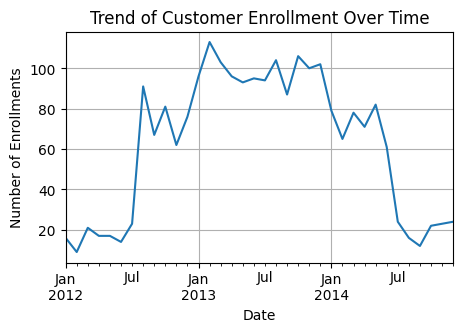

In [7]:
import matplotlib.pyplot as plt

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

data_resampled = data["Dt_Customer"].dt.to_period('M').value_counts().sort_index()
#The dt accessor allows to perform datetime-like operations on the Dt_Customer column. The to_period('M') method converts each datetime value to a period at the monthly frequency.
#the sort_index ensures that the periods are in chronological order, which is important for a time series plot.

plt.figure(figsize=(5, 3))
data_resampled.plot(kind='line')
plt.title('Trend of Customer Enrollment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.grid(True)
plt.show()

The line plot shows the trend of customer enrollment from January 2012 to July 2014. There is a noticeable peak in enrollments around mid-2013, followed by a decline towards mid-2014. The plot helps visualize fluctuations in customer sign-ups over the observed period.

**Income Distribution**

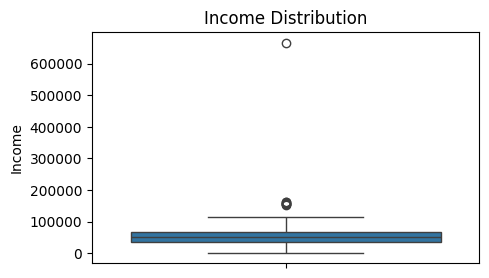

In [8]:
import seaborn as sns
plt.figure(figsize=(5, 3)) 

sns.boxplot(
    y = "Income",
    data = data)

plt.title('Income Distribution')
plt.show()

The box plot illustrates the distribution of income among the customers. Most incomes are concentrated between 25,000 and 75,000, with a few outliers extending above 100,000.

**Income vs. Complaints**

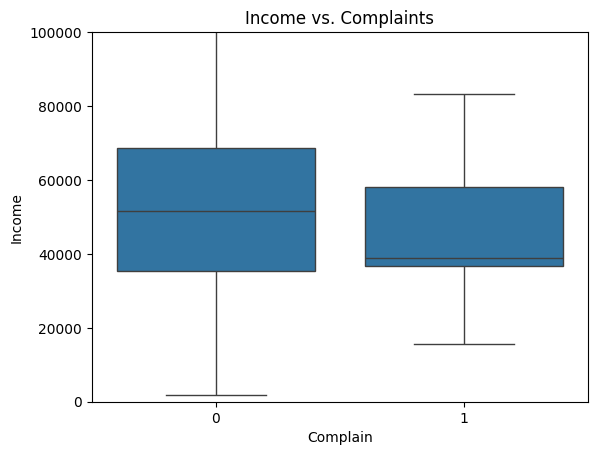

In [9]:
import seaborn as sns

sns.boxplot(
    x="Complain", 
    y="Income", 
    data=data)

plt.ylim(0, 100000)

plt.title('Income vs. Complaints')
plt.show()

The box plot compares the income distribution between customers who have and have not filed complaints. Customers who have not complained (Complain = 0) tend to have a wider range of incomes, with higher median income compared to those who have complained (Complain = 1), indicating a potential correlation between income levels and likelihood of filing complaints.

**Year of Birth Distribution**

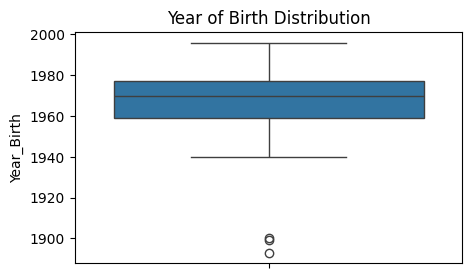

In [10]:
import seaborn as sns
plt.figure(figsize=(5, 3)) 

sns.boxplot(
    y = "Year_Birth",
    data = data)

plt.title('Year of Birth Distribution')
plt.show()

The box plot displays the distribution of customers' years of birth. The majority of customers were born between late 1950s and 1980, with a few outliers before 1920

**Year of Birth vs. Complains**

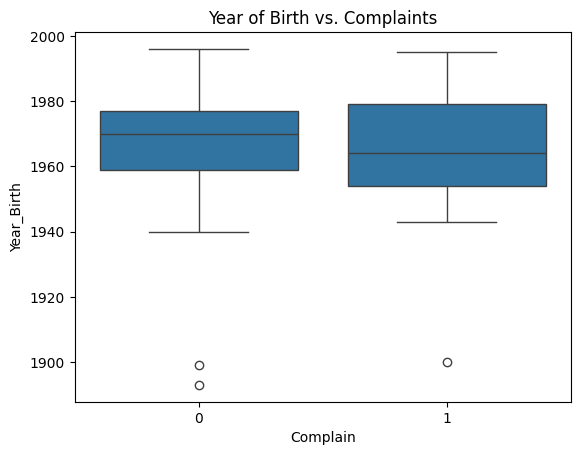

In [11]:
import seaborn as sns

sns.boxplot(
    x="Complain", 
    y="Year_Birth", 
    data=data)

plt.title('Year of Birth vs. Complaints')
plt.show()

This box plot illustrates the distribution of customers' years of birth segmented by whether they have made a complaint (1) or not (0). The distributions appear quite similar across both groups, indicating no significant age-related pattern in the tendency to complain

**Education Level Distribution**

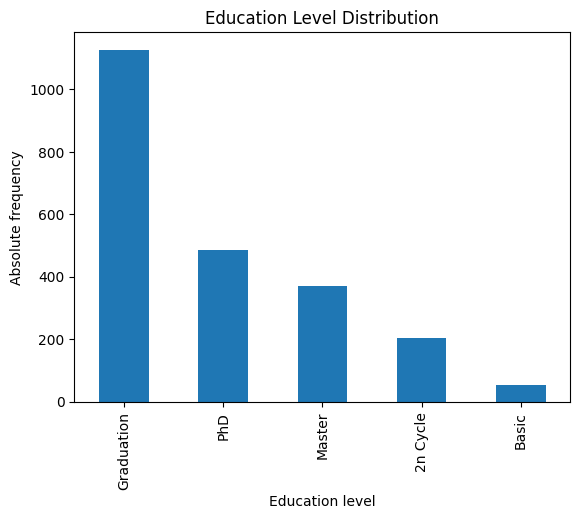

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

data["Education"].value_counts().plot.bar()

plt.xlabel('Education level')
plt.ylabel('Absolute frequency')
plt.title('Education Level Distribution')
plt.show()

The majority of customers have completed graduation, followed by a significant number with PhDs. Master's degrees, 2nd Cycle, and Basic education levels are less common in descending order.

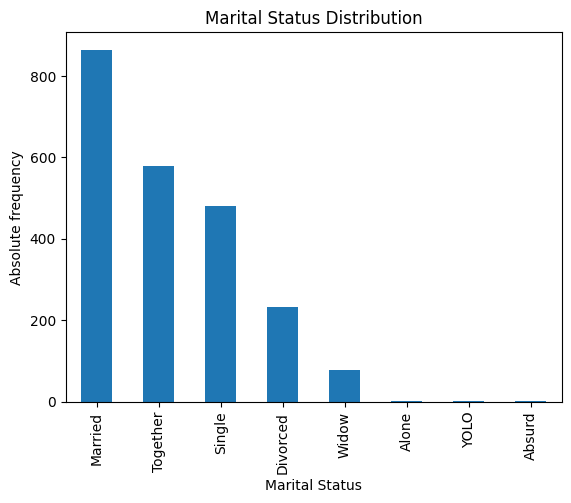

In [13]:
data["Marital_Status"].value_counts().plot.bar()

plt.xlabel('Marital Status')
plt.ylabel('Absolute frequency')
plt.title('Marital Status Distribution')
plt.show()

The majority of customers are married, followed by those living together, single, and divorced. Notably, the "YOLO," "absurd," and "alone" categories are anomalies and may need to be excluded in later analyses due to their likely data entry errors or very low representation.

**Purchase Type Distribution**

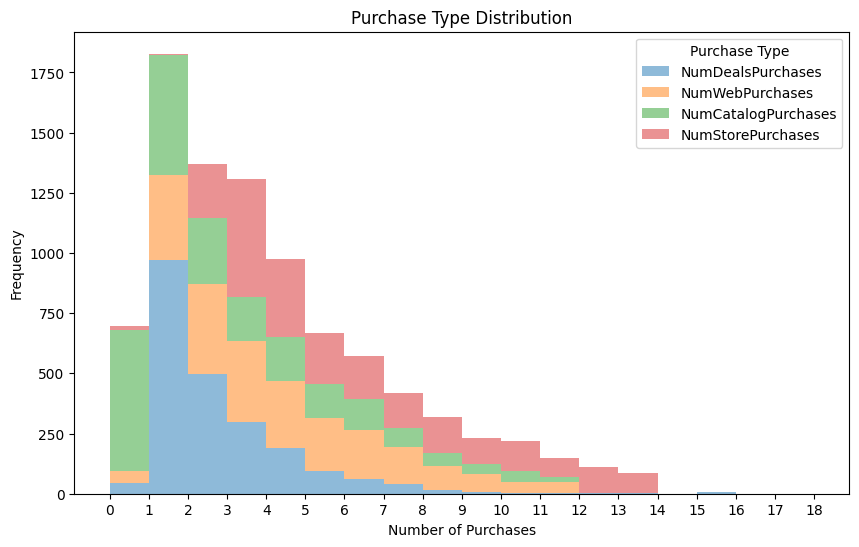

In [14]:
data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].plot.hist(
    bins=range(19),  # Use range to create bins for each integer value from 0 to 18
    alpha=0.5,
    stacked=True,
    figsize=(10, 6)
)

plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.legend(title='Purchase Type')
plt.title('Purchase Type Distribution')

# Set x-axis to show whole numbers
plt.xticks(range(0, 19, 1))

plt.show()


*NumDealsPurchases (Blue):*
The highest frequency is at 1-2 purchases, indicating that many customers utilize at least 1 deal.
The frequency significantly drops after 2 purchases, with very few customers making more than 4 deal purchases.

*NumWebPurchases (Orange):*
The distribution shows a higher frequency in the range of 1-4 purchases.
A noticeable peak is observed around 1 purchases, indicating a common tendency among customers to make a at least one web purchase.
There are still customers making up to 11 web purchases, but their number decreases beyond 4 purchases.

*NumCatalogPurchases (Green):*
Many customers do not use catalog purchases at all, with a peak at 0-2 purchases.
The frequency of catalog purchases drops after 2, and very few customers make more than 4 catalog purchases.

*NumStorePurchases (Red):*
Store purchases show a more even distribution compared to other purchase types, with peaks at 2-3 and a gradual decrease thereafter.
There is a higher frequency of store purchases in the range of 1-6, indicating a preference for in-store shopping among many customers.
Beyond 6 purchases, the frequency continues to drop but remains more consistent than other types of purchases.

*Summary:*
- Deal Purchases: Most customers utilize at 1 deal, but it drops after 2 purchases.
- Web Purchases: Customers tend to make up to 6 web purchases, with a notable peak at 1-2.
- Catalog Purchases: Catalog purchases are less common, with most customers 1-2 purchases, or no purchases at all.
- Store Purchases: Store purchases are more evenly spread out, with higher frequencies at 2-3 purchases, indicating a preference for in-store shopping.

Customers' preference for in-store and web purchases can guide inventory management and marketing strategies to align with their buying habits.
Understanding the lower engagement with deal and catalog purchases can help in designing more effective promotional campaigns to boost these purchase types.


**Spending Features by Income**

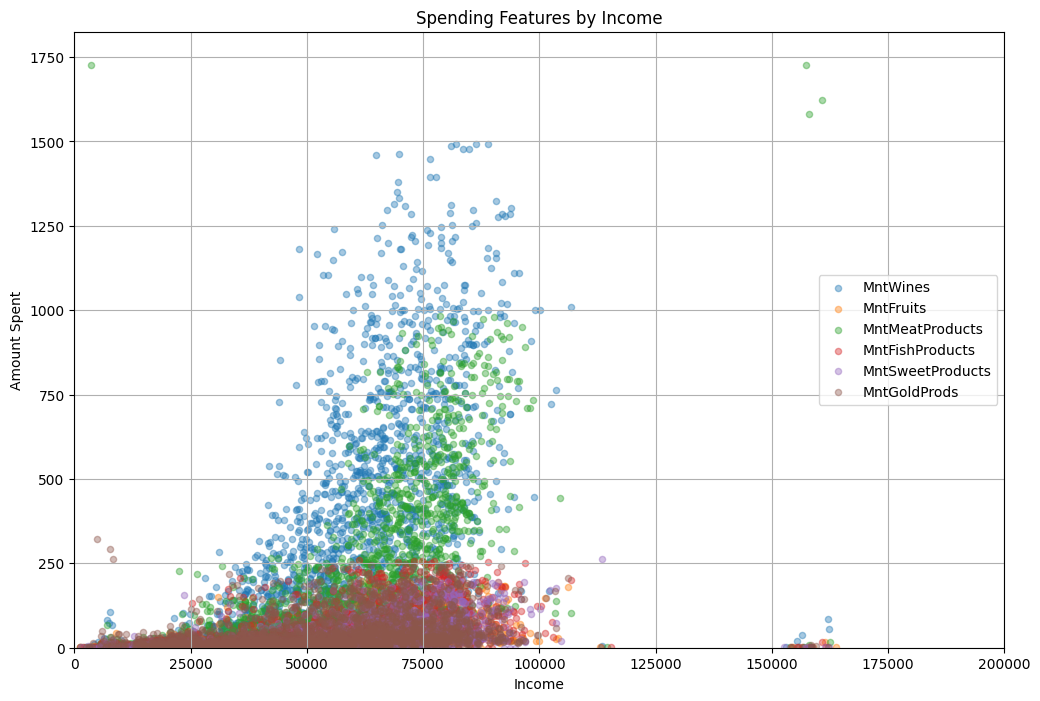

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the spending features
spending_features = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Create the scatter plot
plt.figure(figsize=(12, 8))
for feature in spending_features:
    # Add some jitter to avoid overlapping points
    jitter = np.random.uniform(-2000, 2000, size=len(data['Income']))
    plt.scatter(
        data['Income'] + jitter, data[feature], label=feature, alpha=0.4, s=20
    )

# Customize the plot
plt.legend()
plt.xlabel("Income")
plt.ylabel("Amount Spent")
plt.title('Spending Features by Income')
plt.xlim(0, 200000)
plt.ylim(0, data[spending_features].max().max() + 100)  # Set y limit a bit higher than max spending
plt.grid()
plt.show()


The scatter plot indicates that most customers have incomes between 0 and 100,000 USD, with spending across all product categories primarily clustered within this range. Wines (blue) and meat products (green) exhibit broader spending ranges and higher spending outliers, with noticeable increases in spending, especially for customers with incomes between 75,000 USD and 100,000 USD. 

In contrast, fruits (orange), fish products (red), sweet products (purple), and gold products (brown) show more uniform spending patterns, mostly below 500 USD. There is a clear correlation between higher income and increased spending on wines and meat products, particularly evident in the 75,000 USD to 100,000 USD income bracket. Significant outliers in the wines and meat products categories suggest that some customers spend considerably more. 

The data indicates that marketing efforts should focus on customers with incomes up to 100,000 USD, with targeted premium promotions for wines and meat products, while a different approach may be needed for fruits, fish, sweets, and gold products. Additionally, the presence of high spenders in wines and meat products highlights opportunities for upselling and creating premium tiers.


**NUMERICAL FEATURES CORRELATION**

Spearman correlation will be used instead of Pearson correlation in this analysis because Spearman's method captures the monotonic relationship between variables, regardless of whether the relationship is linear or not. This makes it more robust for identifying correlations in non-linear data, which is important given the diverse nature of the features in our dataset. Using Spearman correlation allows for a more accurate assessment of the relationships between variables, providing better insights for our clustering analysis.

In [16]:
numeric_mask = data.select_dtypes(include = "number").columns
numeric_features = data[numeric_mask]
corr_spearman = numeric_features.corr(method = 'spearman')
corr_spearman

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,1.000000,0.002560,0.004250,0.000659,-0.002968,-0.046027,-0.025715,-0.022229,-0.013184,-0.029127,-0.034261,-0.041622,-0.024119,-0.024703,-0.012401,-0.023173,-0.011305,-0.022234,0.034240
Year_Birth,0.002560,1.000000,-0.217063,0.259345,-0.385527,-0.020661,-0.234200,-0.025445,-0.112499,-0.030594,0.003176,-0.076580,-0.086778,-0.164416,-0.178769,-0.167646,0.131069,0.020730,-0.008610
Income,0.004250,-0.217063,1.000000,-0.559909,0.045909,0.007938,0.830056,0.582379,0.816815,0.577392,0.567087,0.505550,-0.195533,0.573262,0.791841,0.731752,-0.643667,0.161100,-0.030868
Kidhome,0.000659,0.259345,-0.559909,1.000000,-0.046348,0.006299,-0.580307,-0.449922,-0.550614,-0.452752,-0.438709,-0.426392,0.260581,-0.421878,-0.597518,-0.556584,0.481648,-0.077464,0.039710
Teenhome,-0.002968,-0.385527,0.045909,-0.046348,1.000000,0.009889,0.111409,-0.201159,-0.127521,-0.229479,-0.197954,-0.022725,0.480944,0.146133,-0.043755,0.077442,0.111633,-0.159310,0.000983
Recency,-0.046027,-0.020661,0.007938,0.006299,0.009889,1.000000,0.018662,0.025295,0.027822,0.013305,0.024196,0.018376,0.007734,-0.003939,0.030690,0.005543,-0.021892,-0.198169,0.013276
MntWines,-0.025715,-0.234200,0.830056,-0.580307,0.111409,0.018662,1.000000,0.517544,0.823652,0.524609,0.505322,0.575345,0.057165,0.740195,0.823421,0.806918,-0.389039,0.199046,-0.038034
MntFruits,-0.022229,-0.025445,0.582379,-0.449922,-0.201159,0.025295,0.517544,1.000000,0.713169,0.705016,0.691356,0.568750,-0.109789,0.471341,0.634782,0.583358,-0.442861,0.148925,-0.012054
MntMeatProducts,-0.013184,-0.112499,0.816815,-0.550614,-0.127521,0.027822,0.823652,0.713169,1.000000,0.726242,0.695704,0.637912,-0.032182,0.679243,0.851660,0.779336,-0.492302,0.223192,-0.025018
MntFishProducts,-0.029127,-0.030594,0.577392,-0.452752,-0.229479,0.013305,0.524609,0.705016,0.726242,1.000000,0.700871,0.565283,-0.119759,0.466423,0.657124,0.582713,-0.458360,0.115421,-0.028668


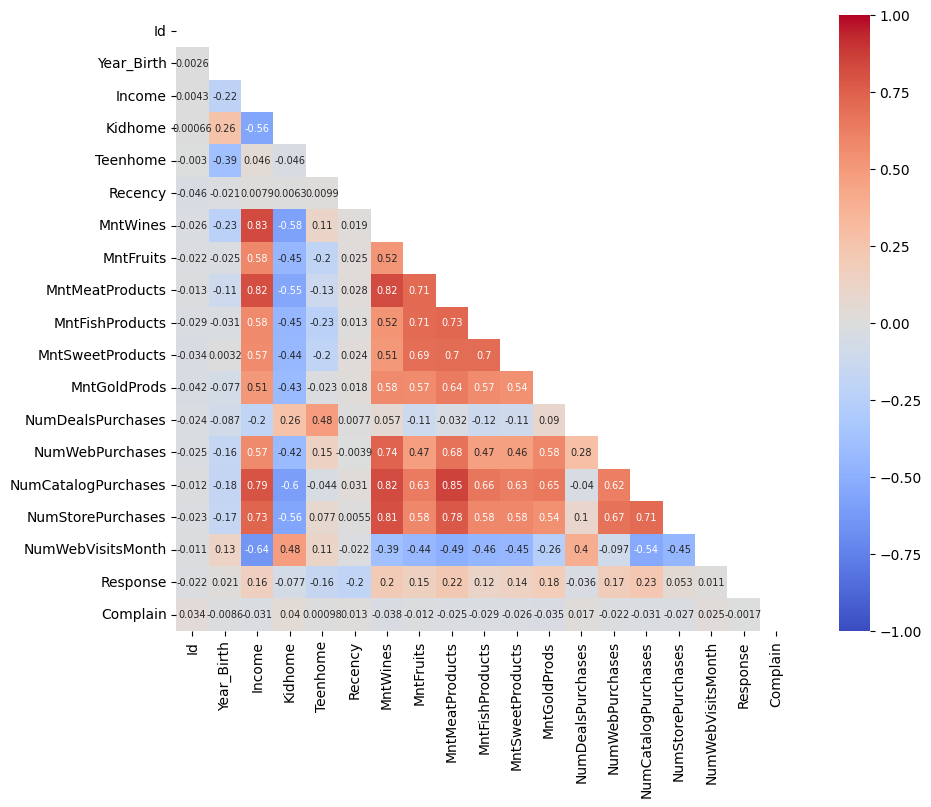

In [17]:
import seaborn as sns
corr = numeric_features.corr(method = 'spearman')

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    vmin = -1., 
    vmax = 1.,
    cmap = 'coolwarm',
    annot = True,
    square = True, 
    mask=np.triu(corr.notnull()),
    annot_kws={"fontsize": 7}
);

In [18]:
from scipy.stats import spearmanr

In [19]:
corr_spearman_no_self = corr_spearman[corr_spearman != 1]

***Most Positive Correlation***:

In [20]:
most_corr_positive = corr_spearman_no_self.unstack().idxmax()
most_corr_positive

('MntMeatProducts', 'NumCatalogPurchases')

In [21]:
data[["MntMeatProducts", "NumCatalogPurchases"]].corr(method = 'spearman')

,MntMeatProducts,NumCatalogPurchases
MntMeatProducts,1.00000,0.85166
NumCatalogPurchases,0.85166,1.00000


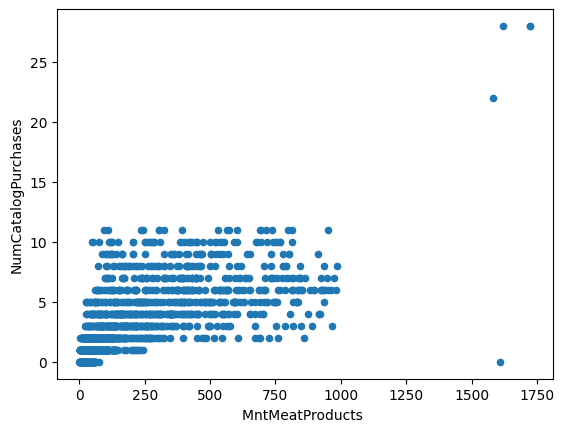

In [22]:
data.plot.scatter(
    x = "MntMeatProducts",
    y = "NumCatalogPurchases"
)


plt.xlabel("MntMeatProducts ")
plt.ylabel("NumCatalogPurchases")


plt.show()

***Most Negative Correlation***:

In [23]:
most_corr_negative = corr_spearman_no_self.unstack().idxmin()
most_corr_negative

('Income', 'NumWebVisitsMonth')

In [24]:
data[["Income", "NumWebVisitsMonth"]].corr(method = 'spearman')

,Income,NumWebVisitsMonth
Income,1.000000,-0.643667
NumWebVisitsMonth,-0.643667,1.000000


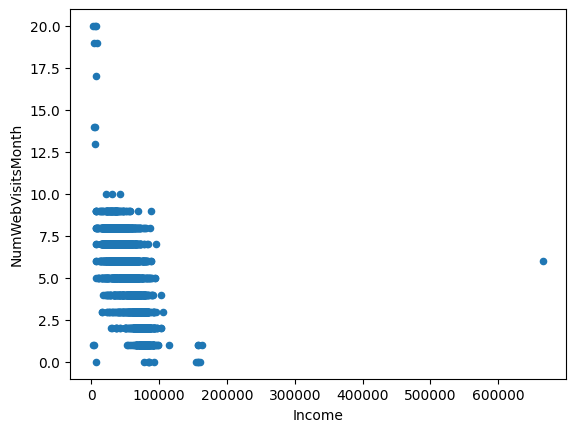

In [25]:
data.plot.scatter(
    x = "Income",
    y = "NumWebVisitsMonth"
)


plt.xlabel("Income")
plt.ylabel("NumWebVisitsMonth")

plt.show()

The correlation matrix provides a visual representation of the relationships between different features in the dataset. Here are some key observations:

*Positive Correlations:*

- Highest Positive Correlation: The correlation between *MntMeatProducts* and *NumCatalogPurchases* is 0.85166, indicating that customers who spend more on meat products also tend to make more catalog purchases.
- *MntWines and Income (0.58)*: Higher income is associated with higher spending on wines.
- *MntMeatProducts and MntFishProducts (0.71)*: Customers who spend more on meat products also tend to spend more on fish products.
- *NumWebPurchases and NumCatalogPurchases (0.72)*: Customers who frequently make web purchases also tend to make catalog purchases.
- *MntWines and MntMeatProducts (0.58)*: Customers who spend more on wines also tend to spend more on meat products.


*Negative Correlations:*

- Highest Negative Correlation: The correlation between *Income* and *NumWebVisitsMonth* is -0.643667, indicating that higher-income customers tend to have fewer web visits per month.
- *Kidhome and Income (-0.56)*: Higher income households tend to have fewer kids at home.
- *NumWebVisitsMonth and MntWines (-0.49)*: More web visits are associated with lower spending on wines.
- *NumWebVisitsMonth and NumStorePurchases (-0.45)*: More web visits correlate with fewer store purchases.

*Summary:*

- Spending Patterns: Customers who spend on specific product categories (wines, meat, fish, sweets) tend to spend on other related categories. This suggests a cluster of high spenders who diversify their purchases.
- Income and Family Size: Higher income is negatively correlated with the number of children and teenagers at home, indicating that wealthier households have fewer dependents.
- Web Visits vs. Spending: Frequent web visits are negatively correlated with income and store purchases, suggesting that lower-income customers and those who spend less in-store might be more active online.
- Purchase Behavior: There is a strong positive relationship between catalog, web, and store purchases, indicating that multi-channel shoppers are likely to spend more overall.
  

### 2. DATA CLEANING

- **MISSING VALUES**

In [26]:
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

There are 24 missing values for Income:

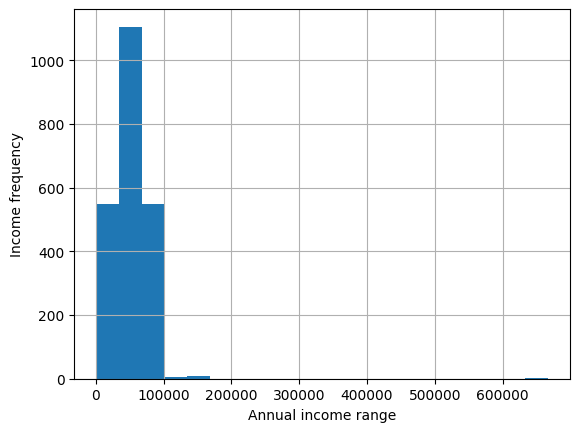

In [27]:

data["Income"].hist(
    bins = 20)


plt.xlabel('Annual income range')
plt.ylabel('Income frequency')

plt.show()

In [28]:
data.Income.describe().round()

count      2216.0
mean      52247.0
std       25173.0
min        1730.0
25%       35303.0
50%       51382.0
75%       68522.0
max      666666.0
Name: Income, dtype: float64

In [29]:
import scipy
from scipy import stats

data["Income"].agg(["mean", "median", "std", "skew", "kurtosis"]).round()

mean        52247.0
median      51382.0
std         25173.0
skew            7.0
kurtosis      160.0
Name: Income, dtype: float64

With a positive skewness value of 7, the tail of the distribution is longer on the right side.
This shows that there are fewer individuals with extremely high annual incomes, but these high incomes contribute to a longer right tail of the distribution.
Since the distribution is positively skewed, there are relatively more individuals with annual incomes lower than the mean. This aligns with the observation that the mean annual income is higher than the median.
Positive skewness is also sensitive to outliers, particularly the higher incomes in this case.

With a positive kurtosis value of 160, it indicates extremely heavy tails and a very sharp peak compared to the normal distribution. This suggests that there are extreme values (both high and low) that occur more frequently. The distribution also has a very sharp peak, indicating that there is a high concentration of values around the mean. This implies that there is less variability in the data compared to a normal distribution, except for the presence of outliers contributing to the heavy tails.

Due to this analysis, I will replace the missing values with median:

In [30]:
median_income = data["Income"].median()

data["Income"] = data["Income"].fillna(value = median_income)

data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

**"Marital_Status" DISCREPANCY:**

In [31]:
data.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

To ensure consistency in the Marital_Status column, I replaced atypical values with more relevant categories. Specifically, "Alone" was replaced with "Single" because it logically fits this category. Additionally, "YOLO" and "Absurd" were replaced with "Single" to maintain a consistent and meaningful dataset. 

In [32]:
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Absurd", "Alone"], "Single")
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

**"Dt_Customer" FORMATTING:**

Create a new feature "Customer_Tenure" based on Dt_Customer, to ensure better interpretation and format:

In [33]:
import pandas as pd


data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Calculate tenure (days since customer joined)
data['Customer_Tenure'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days

# Ensure Customer_Tenure is fixed and independent
data['Customer_Tenure'] = data['Customer_Tenure'].copy()

# Drop Dt_Customer as it is no longer needed
if 'Dt_Customer' in data:
    data.drop(columns=['Dt_Customer'], inplace=True)


print(data['Customer_Tenure'])


0       3679
1       3680
2       3713
3       3537
4       3630
        ... 
2235    4027
2236    4189
2237    4505
2238    4243
2239    4568
Name: Customer_Tenure, Length: 2240, dtype: int64


**CONVERT "Income" FEATURE TO INTEGER:**

In [34]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Customer_Tenure          int64
dtype: object

In [35]:
data['Income'] = data['Income'].astype(int)

- **OUTLIERS:**

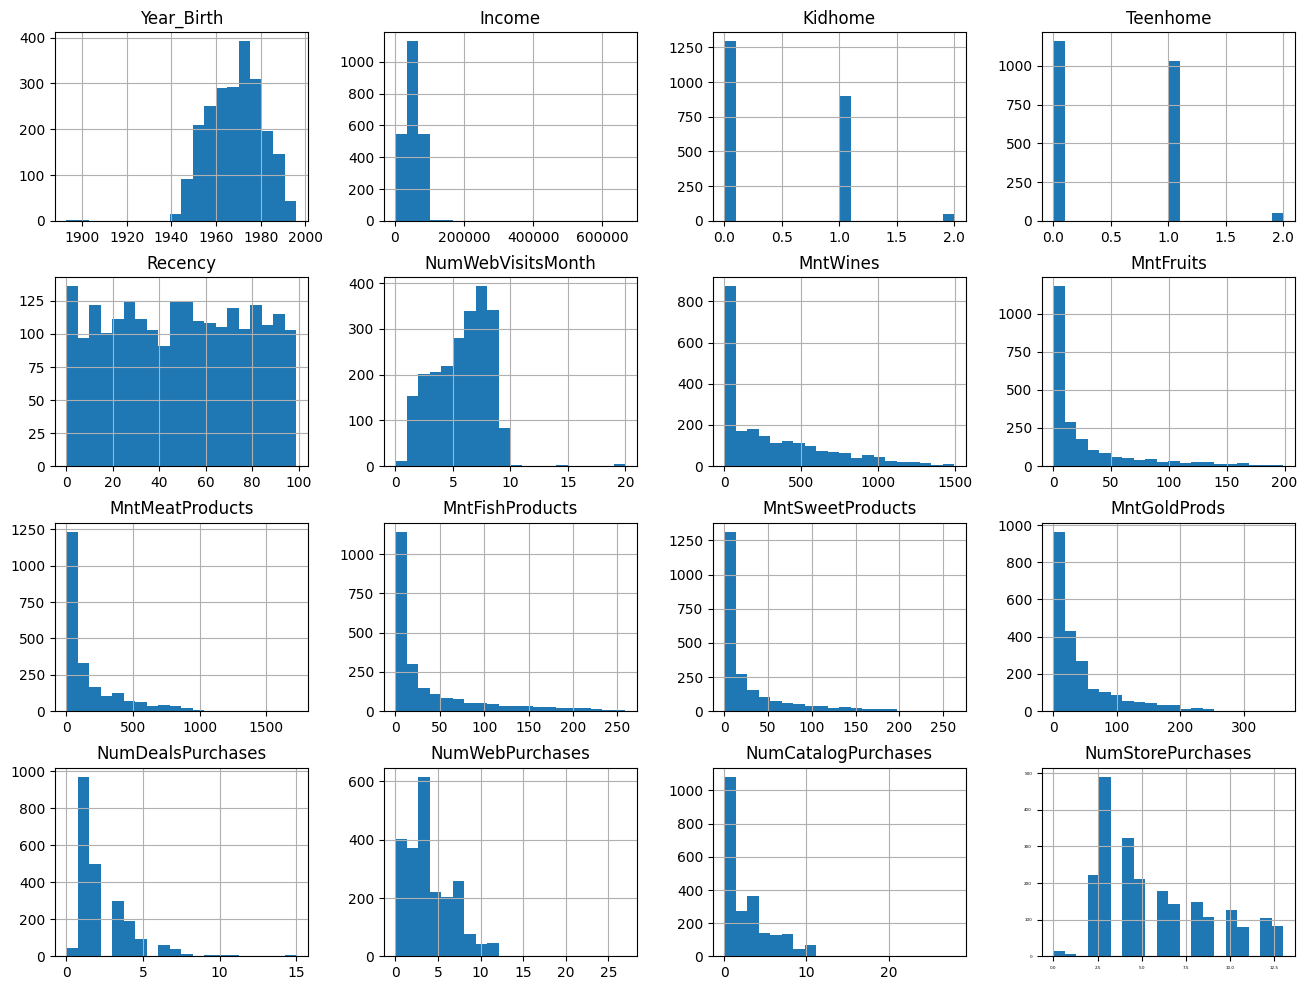

In [36]:
data[["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "NumWebVisitsMonth",
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].hist(bins=20, layout=(4, 4), figsize=(16, 12))

plt.xticks(fontsize=3)
plt.yticks(fontsize=3)

plt.show()


Based on the above histogram plots, I will address outliers in the following features:

- "Year_Birth": Outliers before 1920: These data points likely represent either data entry errors or extremely old ages that are not representative of the target customer demographic. Removing these outliers will help in achieving a more accurate analysis of the typical customer's age range.
- "Income": High-income outliers up to 600k USD: Extremely high incomes can skew the analysis and obscure trends among the majority of customers. 
- "NumWebVisitsMonth": The distribution shows some customers visiting the website very frequently. High values may indicate either exceptionally engaged customers or potential data entry errors.
- "NumDealsPurchases": A significant number of purchases using deals can be seen. Extremely high values might indicate a small subset of highly deal-sensitive customers or data anomalies. 
- "NumWebPurchases": The distribution indicates varied usage of web purchases. Outliers here can help identify highly active online shoppers versus the general population. Treating these outliers ensures the main trends in online shopping behavior are clear.
- "NumCatalogPurchases": Similar to web purchases, catalog purchases show some customers making frequent purchases. High outliers need to be assessed to ensure they represent genuine behavior rather than data inconsistencies.
- "NumStorePurchases": Store purchases exhibit a more spread-out distribution. Addressing high-frequency outliers will help in better understanding the shopping behavior in physical stores and ensuring these do not distort the overall analysis.

For product categories like meat, fish, wine, etc., outliers in the amount spent reflect significant customer behavior and preferences. These high spending values are crucial for identifying and understanding high-value customers who contribute significantly to revenue. These outliers represent genuine spending patterns and are essential for segmenting customers based on purchasing power and preferences. Removing or altering these outliers would obscure these valuable insights and hinder the ability to tailor marketing strategies effectively.


In [37]:
shape_before_outliers = data.shape[0]
shape_before_outliers

2240

***"Year_Birth":***

In [38]:
data["Year_Birth"].value_counts().sort_index(ascending = True).head(10)

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
Name: count, dtype: int64

In [39]:
data.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [40]:
Q1 = data["Year_Birth"].quantile(0.25)
Q3 = data["Year_Birth"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

1932.0 2004.0


To handle outliers in the "Year_Birth" column, I will use a combination of the IQR method and business insight. The IQR method suggested a lower bound of 1932. However, to ensure relevance and maintain the quality of the dataset, I decided to remove records with birth years before 1940, as there are only 4 customers born before that year. This approach will help focus on a more relevant customer age range, ensuring better analytical outcomes.

In [41]:
data = data[data["Year_Birth"] >= 1940]
data.Year_Birth.value_counts().sort_index().head(5)

Year_Birth
1940    1
1941    1
1943    7
1944    7
1945    8
Name: count, dtype: int64

***"Income":***

I applied custom filter for the "Income" feature, keeping values up to 200k to retain significant customer segments while excluding extreme outliers. We want to include high-income customers who might be valuable for the analysis. This approach ensures that we retain significant customer segments while still excluding extreme outliers that might skew the analysis.

In [42]:
data = data[data['Income'] <= 200000]

***'NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases':***

For the remaining features, we applied IQR Method:

In [43]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of features to process
outlier_features_to_remove = [
    'NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]

# Apply the IQR method to remove outliers for the selected features with debugging
for feature in outlier_features_to_remove:
    data = remove_outliers_iqr(data, feature)

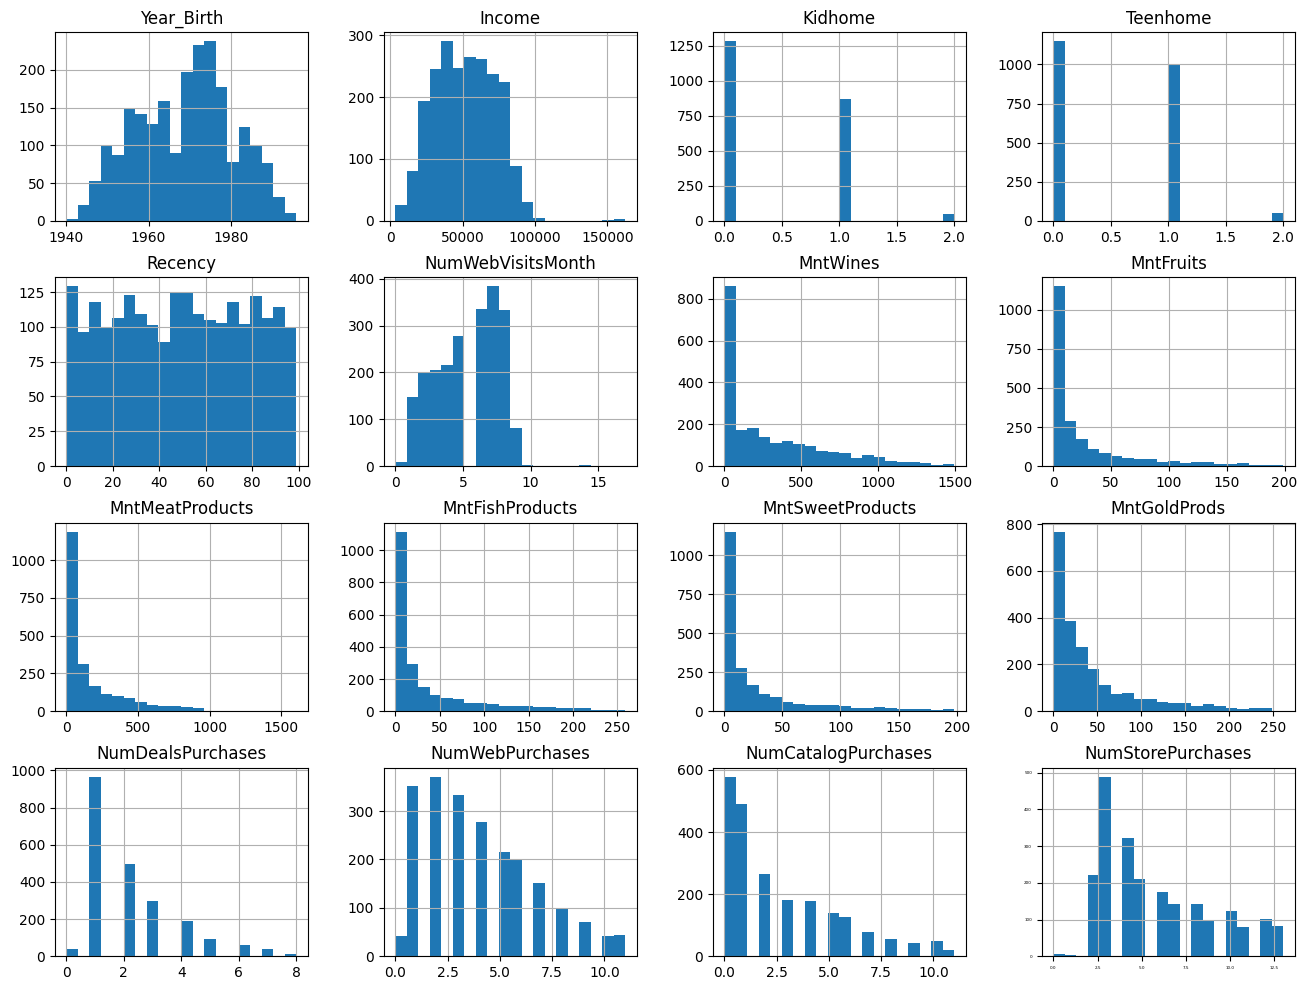

In [44]:
data[["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "NumWebVisitsMonth",
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].hist(bins=20, layout=(4, 4), figsize=(16, 12))

plt.xticks(fontsize=3)
plt.yticks(fontsize=3)

plt.show()

To handle outliers, we selectively removed them from features where extreme values are less likely to represent significant customer segments or critical data points. Specifically, we removed outliers from NumWebVisitsMonth, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases using the IQR method with a multiplier of 2.5. We retained outliers in spending features (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) to preserve valuable data about high-income customers and high spenders. This approach ensured a balanced dataset that retained critical information while mitigating the impact of extreme outliers.

In [45]:
shape_after_outliers = data.shape[0]
outliers = shape_before_outliers - shape_after_outliers
outliers

43

This approach led to the removal of 43 outliers, striking a balance between addressing skewness and retaining significant data points for accurate analysis.

### 3. FEATURE ENGINEERING

***REMOVE FEATURES:***

Remove columns "Id" and "Response":  The "Id" column is a unique identifier that does not provide analytical value, and the "Response" column indicates campaign responses, which is target. Since we're doing unsupervised learning, we need to remove it. 

In [46]:
data = data.drop(columns = ["Id", "Response"])

*Variance Threshold Feature Removal:*

To ensure the dataset retains only informative features, a variance threshold of 0.05 will be applied to identify low variance features among numeric columns:

In [47]:
numeric_mask1 = data.select_dtypes(include='number').columns
numeric_features1 = data[numeric_mask1]

In [48]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold=0.05)
var_th.fit_transform(numeric_features1)

array([[ 1970, 84835,     0, ...,     6,     1,  3679],
       [ 1961, 57091,     0, ...,     7,     5,  3680],
       [ 1958, 67267,     0, ...,     5,     2,  3713],
       ...,
       [ 1976, 46310,     1, ...,     5,     8,  4505],
       [ 1978, 65819,     0, ...,    10,     3,  4243],
       [ 1969, 94871,     0, ...,     4,     7,  4568]], dtype=int64)

In [49]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True])

In [50]:
numeric_features1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Tenure
0,1970,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,3679
1,1961,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,3680
2,1958,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,3713
3,1967,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,3537
4,1989,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,3630


In [51]:
data = data.drop(columns = ["Complain"])

Using VarianceThreshold from sklearn, it was determined that the Complain feature had low variance and thus was removed. This step helps in improving the quality of the dataset by focusing on features with sufficient variance, likely to be more useful for further analysis.

***CREATE NEW FEATURES***

To enhance the dataset, we'll create new features to capture aggregate and average behaviors. "TotalAmountSpent" sums up spending across various product categories, providing a comprehensive view of customer expenditure. "TotalPurchases" combines different purchase types to summarize overall purchasing activity. "AverageSpending" to reflect the average amount spent per purchase by dividing TotalAmountSpent by TotalPurchases. Similarly, RecentActivity was calculated by dividing Recency by Customer_Tenure to measure customer engagement over time. 

To handle potential issues with division by zero or non-finite values, any infinite or NaN results were replaced with zero and the columns were converted to integers for consistency.

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data['TotalAmountSpent'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                            data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])

data['TotalPurchases'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + 
                          data['NumCatalogPurchases'] + data['NumStorePurchases'])

# Handle division by zero and non-finite values for AverageSpending
data['AverageSpending'] = data['TotalAmountSpent'] / data['TotalPurchases']
data['AverageSpending'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['AverageSpending'].fillna(0, inplace=True)  # Fill NaN values with 0
data['AverageSpending'] = data['AverageSpending'].astype(int)  # Convert to integer

# Handle division by zero and non-finite values for RecentActivity
data['RecentActivity'] = data['Recency'] / data['Customer_Tenure']
data['RecentActivity'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['RecentActivity'].fillna(0, inplace=True)
data['RecentActivity'] = data['RecentActivity'].astype(int)

### 4. DATA PRE-PROCESSING

For data pre-processing, we'll apply the following steps:
- MinMaxScaler for numerical features
- Ordinal Encoding for "Education", "Teenhome", and "Kidhome"
- OHE Encoding for "Marital_Status"

In [53]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [54]:
numerical_features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Tenure','TotalAmountSpent', 'AverageSpending', 'TotalPurchases', 'RecentActivity']
categorical_features = ['Education', 'Marital_Status']
ordinal_features = ['Kidhome', 'Teenhome']

In [55]:
data.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [56]:
data.Teenhome.unique()

array([0, 1, 2], dtype=int64)

In [57]:
data.Kidhome.unique()

array([0, 1, 2], dtype=int64)

In [58]:
numerical_transformer = Pipeline(steps = [
    ('scaler', MinMaxScaler())
])


education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
categorical_transformer = ColumnTransformer(
    transformers=[
        ('edu', OrdinalEncoder(categories = [education_order]), ["Education"]),
        ('marital', OneHotEncoder(), ["Marital_Status"])
    ],
    remainder = 'passthrough'
)


kid_teen_order = [[0, 1, 2]]
ordinal_transformer = ColumnTransformer(
    transformers=[
        ('kidhome', OrdinalEncoder(categories = kid_teen_order), ["Kidhome"]),
        ('teenhome', OrdinalEncoder(categories = kid_teen_order), ["Teenhome"])
    ],
    remainder = 'passthrough'
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder = 'passthrough'
)

data_preprocessed = preprocessor.fit_transform(data)
data_preprocessed

array([[0.53571429, 0.51186633, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.33726046, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32142857, 0.40130275, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.64285714, 0.26941062, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67857143, 0.39218981, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51785714, 0.57502753, 1.        , ..., 0.        , 0.        ,
        2.        ]])

In [59]:
edu_columns = ['Education']
marital_columns = preprocessor.named_transformers_['cat'].named_transformers_['marital'].get_feature_names_out(['Marital_Status'])
kidhome_columns = ['Kidhome']
teenhome_columns = ['Teenhome']
columns = numerical_features + edu_columns + list(marital_columns) + kidhome_columns + teenhome_columns
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=columns)
data_preprocessed_df


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,TotalPurchases,RecentActivity,Education,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome,Teenhome
0,0.535714,0.511866,0.0,0.126591,0.522613,0.235843,0.428571,0.954545,0.832061,0.125,...,0.428571,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375000,0.337260,0.0,0.310784,0.025126,0.039826,0.027027,0.000000,0.141221,0.125,...,0.514286,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.321429,0.401303,0.0,0.089752,0.055276,0.036714,0.057915,0.010101,0.114504,0.125,...,0.314286,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.482143,0.182334,0.0,0.006698,0.000000,0.000622,0.000000,0.000000,0.000000,0.125,...,0.114286,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.875000,0.113106,0.0,0.004019,0.080402,0.014935,0.042471,0.000000,0.129771,0.250,...,0.228571,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0.642857,0.396325,1.0,0.249163,0.090452,0.078407,0.181467,0.242424,0.297710,0.250,...,0.571429,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2193,0.660714,0.173410,1.0,0.003349,0.050251,0.008090,0.011583,0.040404,0.061069,0.125,...,0.142857,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2194,0.642857,0.269411,1.0,0.123912,0.010050,0.054760,0.057915,0.025253,0.053435,0.250,...,0.400000,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2195,0.678571,0.392190,1.0,0.178835,0.190955,0.436217,0.575290,0.833333,0.240458,0.125,...,0.571429,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
data_preprocessed_df.shape

(2197, 27)

### 5. CLUSTERING TECHNIQUES: MACHINE LEARNING

I will explore and apply three different machine learning clustering algorithms to segment the customer dataset: K-Means, DBSCAN, and Hierarchical Clustering.

***K-MEANS***

In [61]:
X = data_preprocessed_df.copy()

In [62]:
from sklearn.cluster import KMeans
import random

seed = 42

sse = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = seed, n_init = 10).fit(X)

    sse[k] = kmeans.inertia_

#for every k between 1 and 10 (we're choosing the number of clusters), run the k-means and will calculate inertia for different numbers of clusters and store in sse.
#Inertia: A measure of how well the clusters are formed. It is the sum of squared distances from each point to its assigned centroid. The lower the better.

Text(0, 0.5, 'SSE')

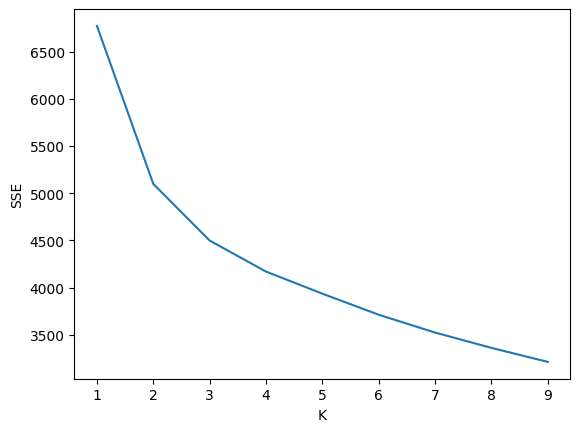

In [63]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("K")
plt.ylabel("SSE")

The Elbow Method plot shown above illustrates the Sum of Squared Errors (SSE) for different values of K (the number of clusters) in K-Means clustering. As K increases, the SSE decreases, indicating better-defined clusters. However, after a certain point (around K=3), the rate of decrease slows down, forming an "elbow." This suggests that the optimal number of clusters for this dataset is likely between 2 and 3, as adding more clusters beyond this point provides diminishing returns in terms of reducing SSE.

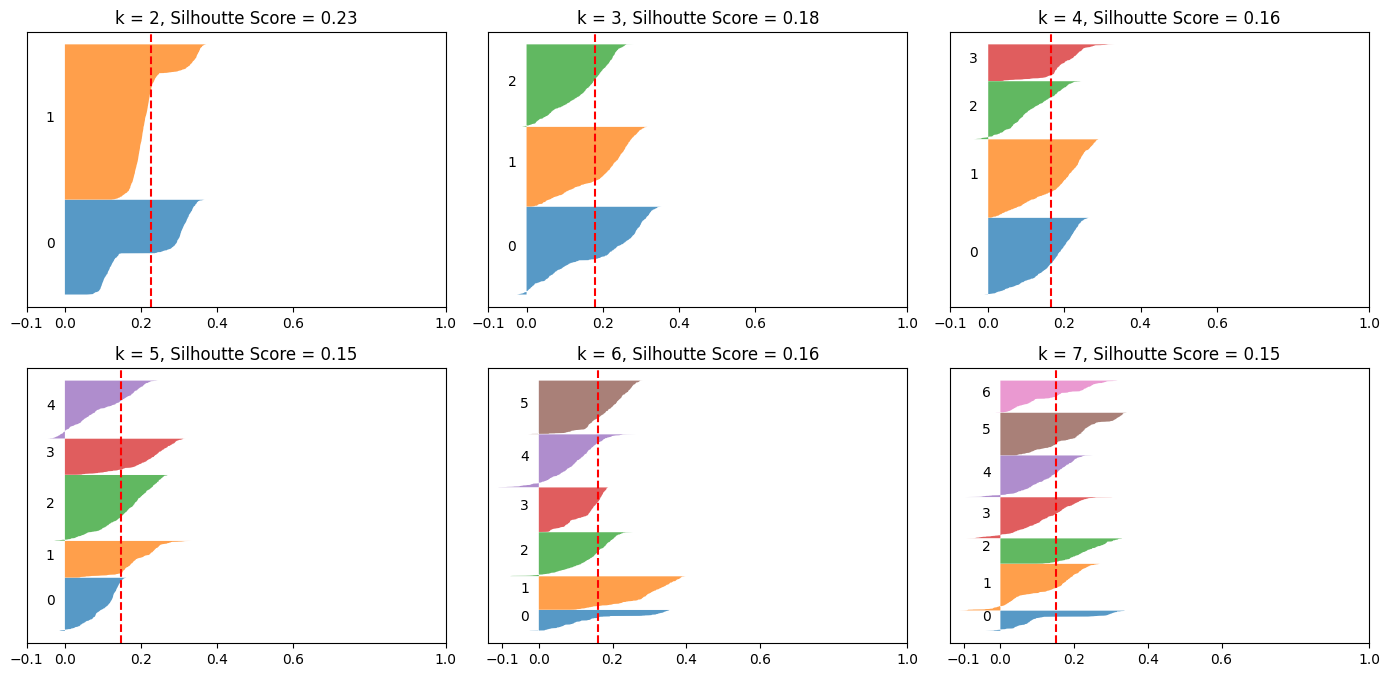

In [64]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA

fig = plt.figure(figsize = (14, 10))

range_n_clusters = [2, 3, 4, 5, 6, 7]

i = 1
#specifies the index of the subplot within the grid. i iterates over the values in range_n_clusters, which ranges from 2 to 7 in this case.

for n_clusters in range_n_clusters:

  ax = fig.add_subplot(3, 3, i)
  # 3 rows and 3 columns

  kmeans = KMeans(n_clusters = n_clusters, random_state = seed, n_init = 10).fit(X)

  sample_silhoutte_values = silhouette_samples(X, kmeans.labels_)

  silhoutte_score_mean = silhouette_score(X, labels = kmeans.labels_)

  y_lower = 1

  for k in np.unique(kmeans.labels_):

    s_values = sample_silhoutte_values[kmeans.labels_ == k]

    s_values.sort()

    y_upper = y_lower + s_values.shape[0]

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, s_values, alpha = 0.75)

    ax.text(-0.05, y_lower + 0.5*s_values.shape[0], str(k))

    y_lower = y_upper + 1

  ax.axvline(x = silhoutte_score_mean, color = 'red', linestyle = '--')

  ax.set_yticks([])

  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 1])

  ax.set_title(str('k = ' + str(n_clusters) + ', Silhoutte Score = ' + str(round(silhoutte_score_mean, 2))))

  i = i + 1

plt.tight_layout()

The silhouette analysis for K-Means clustering shows the silhouette scores for different values of K (number of clusters) ranging from 2 to 7. Silhouette scores measure how similar a point is to its own cluster compared to other clusters, with a higher score indicating better-defined clusters.

For K=2, the silhouette score is 0.23, which is the highest among the tested values, suggesting that 2 clusters provide the best-defined separation in this dataset.
For K=3, the silhouette score drops to 0.18, indicating less clear separation between the clusters.
As K increases from 4 to 7, the silhouette scores further decrease, ranging between 0.15 and 0.16, showing that the addition of more clusters does not improve the separation significantly.
Based on these results, K=2 provides the optimal clustering structure for this dataset using K-Means, as indicated by the highest silhouette score.

**Hierarchical Method**

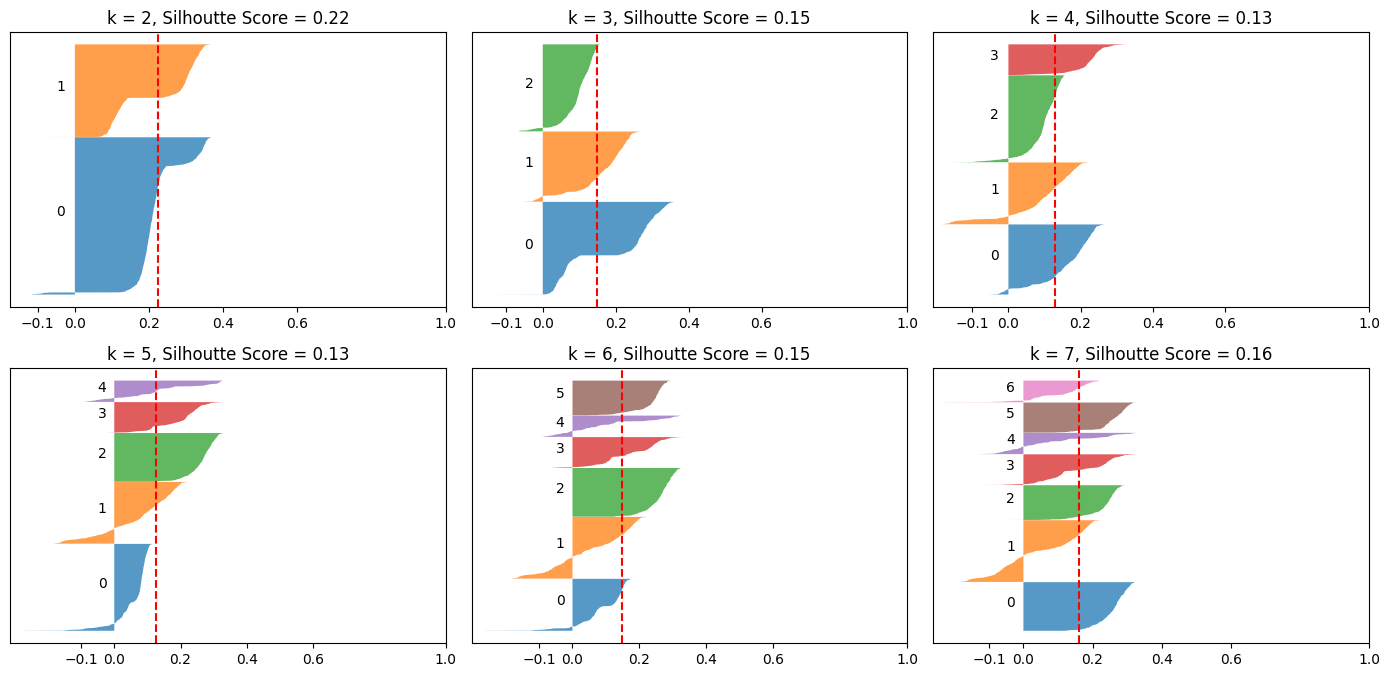

In [65]:
fig = plt.figure(figsize = (14, 10))

range_n_clusters = [2, 3, 4, 5, 6, 7]

i = 1
#specifies the index of the subplot within the grid. i iterates over the values in range_n_clusters, which ranges from 2 to 7 in this case.

for n_clusters in range_n_clusters:

  ax = fig.add_subplot(3, 3, i)
  # 3 rows and 3 columns

  agg = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward').fit(X)

  sample_silhoutte_values = silhouette_samples(X, agg.labels_)

  silhoutte_score_mean = silhouette_score(X, labels = agg.labels_)

  y_lower = 1

  for k in np.unique(agg.labels_):

    s_values = sample_silhoutte_values[agg.labels_ == k]

    s_values.sort()

    y_upper = y_lower + s_values.shape[0]

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, s_values, alpha = 0.75)

    ax.text(-0.05, y_lower + 0.5*s_values.shape[0], str(k))

    y_lower = y_upper + 1

  ax.axvline(x = silhoutte_score_mean, color = 'red', linestyle = '--')

  ax.set_yticks([])

  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 1])

  ax.set_title(str('k = ' + str(n_clusters) + ', Silhoutte Score = ' + str(round(silhoutte_score_mean, 2))))

  i = i + 1

plt.tight_layout()

The silhouette analysis for Hierarchical clustering shows that the best-defined clusters are achieved with 2 clusters (K=2) with a silhouette score of 0.22. As the number of clusters increases from 3 to 7, the silhouette scores decrease, indicating less clear separation between clusters. Therefore, K=2 is the optimal number of clusters for this dataset using Hierarchical clustering.

**EPS/DBSCAN Method**

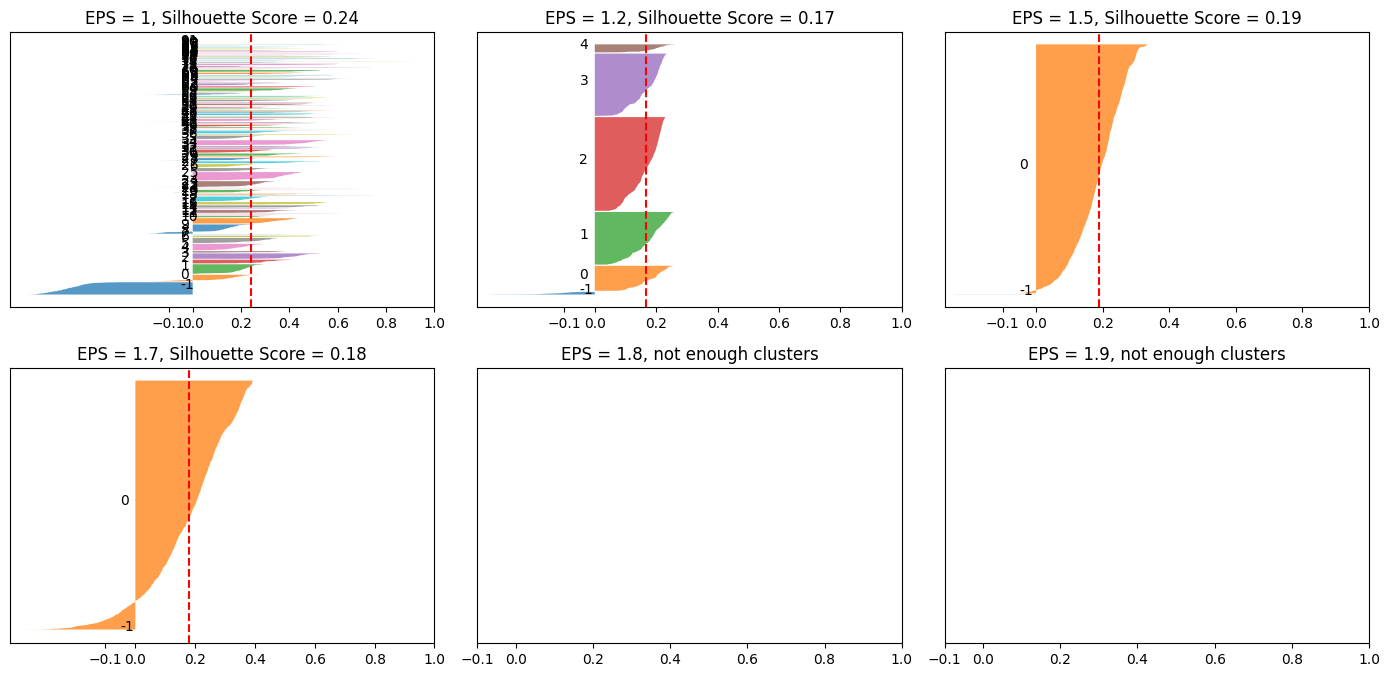

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

fig = plt.figure(figsize=(14, 10))

eps_range = [1, 1.2, 1.5, 1.7, 1.8, 1.9]

i = 1

for eps in eps_range:
    ax = fig.add_subplot(3, 3, i)
    
    dbscan = DBSCAN(eps=eps, min_samples=3).fit(X)
    labels = dbscan.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    num_labels = len(np.unique(labels))
    
    if num_labels > 1 and num_labels < len(X):
        sample_silhouette_values = silhouette_samples(X, labels)
        silhouette_score_mean = silhouette_score(X, labels)
        
        y_lower = 10
        for k in np.unique(labels):
            s_values = sample_silhouette_values[labels == k]
            s_values.sort()
            y_upper = y_lower + s_values.shape[0]
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, s_values, alpha=0.75)
            ax.text(-0.05, y_lower + 0.5 * s_values.shape[0], str(k))
            y_lower = y_upper + 10
        
        ax.axvline(x=silhouette_score_mean, color='red', linestyle='--')
        ax.set_title(f'EPS = {eps}, Silhouette Score = {round(silhouette_score_mean, 2)}')
    else:
        ax.set_title(f'EPS = {eps}, not enough clusters')
    
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    i += 1

plt.tight_layout()
plt.show()


The silhouette analysis for DBSCAN shows the best cluster definition at EPS = 1 with a score of 0.24. Higher EPS values result in lower scores or insufficient clusters, indicating EPS = 1 is optimal for this dataset.

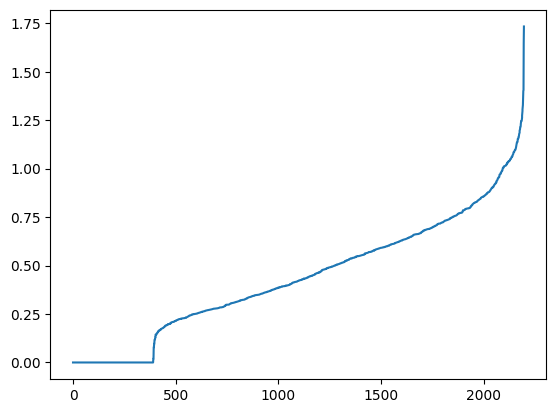

In [67]:
nnbrs = NearestNeighbors(n_neighbors = 2).fit(X)

distances, indices = nnbrs.kneighbors(X)

distancesDec = sorted(distances[:, 1], reverse = False)

plt.plot(indices[:,0], distancesDec)

The nearest neighbors plot helps to determine the optimal value of epsilon (EPS) for DBSCAN. The "elbow" in the curve, around 1.0, suggests a good EPS value where the rate of distance increase sharply changes, indicating the point at which clusters start to form.

Below, we'll apply K-Means clustering to the dataset to create two clusters. K-Means was chosen due to its simplicity and effectiveness in identifying distinct groupings within the data. Despite the small silhouette scores observed during evaluation, indicating that the clusters might not be well-separated, we proceed with the analysis to investigate and understand the characteristics of the clusters formed. The process includes fitting the K-Means algorithm, assigning cluster labels, and calculating cluster centers for all features. Visualizations such as box plots and pair plots are used to examine the distribution of income across clusters and explore the relationships between specific features (Income, Year_Birth, TotalPurchases, and Education) within each cluster, providing insights into the clustering results.

Cluster Centers:
   Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0    0.475347  0.321234  0.488013  0.249490   0.104792         0.101718   
1    0.542470  0.294386  0.504125  0.174968   0.150699         0.103089   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         0.112715          0.102368      0.133313           0.277311   
1         0.166131          0.156292      0.186195           0.273369   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         0.380989             0.250464           0.460984           0.304216   
1         0.358504             0.231938           0.436612           0.314689   

   Customer_Tenure  TotalAmountSpent  AverageSpending  TotalPurchases  \
0         0.463438          0.252458         0.020323        0.433065   
1         0.489322          0.228030         0.019120        0.410222   

   RecentActivity  Education  Marital_Status_Divorced  Marital_Status_Mar

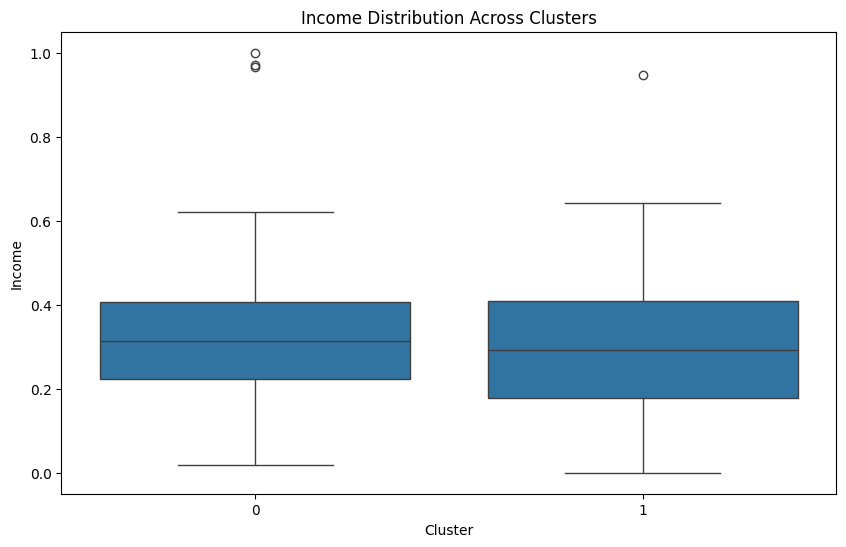

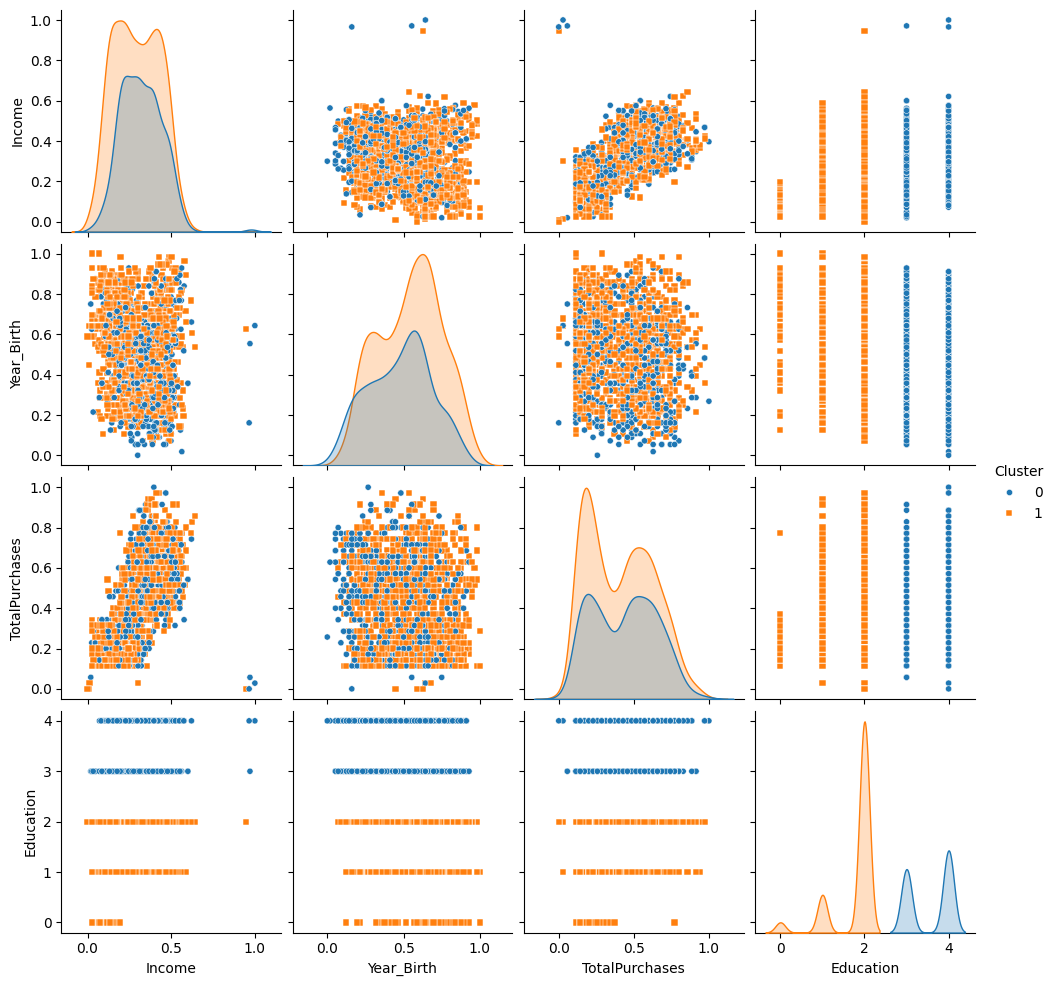

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit K-Means on the original data
kmeans = KMeans(n_clusters=2, random_state=42, )
X['Cluster'] = kmeans.fit_predict(X.drop(columns=['Cluster'], errors='ignore'))
#drop the 'Cluster' column from X to ensure that the clustering algorithm is only applied to the original features of the dataset and not to any previously assigned cluster labels.

# Calculate cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[:-1]) #exclude last column, in this case, 'Cluster'

# Set display options to show all columns
pd.set_option('display.max_columns', None)

print("Cluster Centers:")
print(cluster_centers)


# Reset display options to default after printing
pd.reset_option('display.max_columns')



# Box plot of Income across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=X)
plt.title('Income Distribution Across Clusters')
plt.show()


# Additional pairplot focusing on specific features
sns.pairplot(X, hue='Cluster', vars=['Income', 'Year_Birth', 'TotalPurchases', 'Education'], markers=['o', 's'], plot_kws={'s': 20})
plt.show()



The box plot shows that the median income is similar across both clusters, but cluster 1 has a slightly wider spread. Cluster 0, however, exhibits a broader range of incomes, including outliers that extend to the highest income levels.

Pair Plot Analysis:

- *Income vs. Year of Birth*: Cluster 0 (blue) contains older individuals with a higher range of income levels, while cluster 1 (orange) comprises younger individuals with a lower spread of income.

- *Income vs. Total Purchases*: Both clusters show a positive correlation between income and total purchases. Cluster 0 has slightly higher purchases for higher income levels.

- *Total Purchases vs. Year of Birth*: Younger individuals (Cluster 1) tend to have fewer total purchases compared to older individuals (Cluster 0).

- *Education*: On all plots, there's a clear difference between Education levels on both clusters: Older individuals have a higher education levels compared to younger ones (cluster 1).

In [69]:
X.Cluster.value_counts()

Cluster
1    1364
0     833
Name: count, dtype: int64

In [70]:
X.Cluster.value_counts(normalize = True)*100

Cluster
1    62.084661
0    37.915339
Name: proportion, dtype: float64

****SUMMARY****

This analysis aims to segment a customer dataset into distinct clusters based on their purchase behavior and demographic information. I employed K-Means clustering with 2 clusters, selected due to the highest silhouette score of 0.24, indicating a modest but identifiable structure in the data.

Clustering Process:
- Algorithm Used: K-Means Clustering
- Number of Clusters: 2
- Silhouette Score: 0.24

Cluster Distribution:
- *Cluster 0*: 833 customers (38%)
- *Cluster 1*: 1364 customers (62%)

*Key Insights from Clusters*

- Age (Year of Birth):

    - Cluster 0: Generally older customers (lower normalized year of birth).
    - Cluster 1: Generally younger customers (higher normalized year of birth).


- Income:
  
    - Cluster 0: Slightly higher average income compared to Cluster 1.
    - Cluster 1: Slightly lower average income.


- Purchasing Behavior:

    - Cluster 0: Higher spending on wines. Overall, total amount spent and purchases are higher.
    - Cluster 1: Higher spending on fruits, fish, sweet, and gold products.

    - Cluster 0: More frequent catalog, store, and web purchases.
    - Cluster 1: More frequent web visits per month.


- Education:

    - Cluster 0: Higher education than cluster 0.
    - Cluster 1: Lower education level.


- Marital Status:
    - Cluster 0: Slightly higher proportion of divorced and widowed individuals.
    - Cluster 1: Slightly higher proportion of single and married individuals.


- Children:
    - Cluster 0: Higher number of teenage children at home.
    - Cluster 1: Higher number of younger children at home.


- Customer Tenure:
    - Cluster 0: Lower average customer tenure.
    - Cluster 1: Higher average customer tenure.



The clustering analysis identified two main customer segments:

- **Cluster 0:**

This cluster generally consists of older individuals who exhibit higher overall spending across various purchasing channels, with a particular focus on products like wine and meat. They tend to have a higher education level, are more likely to be divorced, and often have teenagers at home.

- **Cluster 1:**

This cluster is generally composed of younger individuals with more focused spending patterns, particularly on deals and specific product categories such as fish, fruits, and sweets. They also have a higher rate of web visits per month, but less purchases. They are more likely to be single and/or married, and have young children at home.


*Justification of Low Silhouette Score*

The low silhouette score (0.24) indicates that while there is some structure in the data, the clusters are not highly distinct. This can be attributed to several factors:

- Overlap in Feature Space: The features used may have significant overlap between clusters, making it hard to distinguish them clearly.
- Intrinsic Data Variability: The inherent variability in customer behavior and demographics can contribute to less clear-cut clusters.
- Small Dataset Size: With only around 2,200 rows, the dataset may not provide enough data points to form well-separated clusters. A larger dataset might reveal more distinct groupings.

Despite the low silhouette score, the clustering analysis provides valuable insights into customer segmentation, helping to identify distinct groups based on spending patterns and demographics. This can be useful for targeted marketing strategies and personalized customer engagement.